# Content Recommendation System 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import ast
import random
import joblib
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

random.seed(42)
np.random.seed(42)

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv(r'C:\Users\rohin\Downloads\Users.csv')

In [3]:
df

,user_id,age,gender,top_3_interests,past_engagement_score
0,U1,24,F,"sports, art, gaming",0.61
1,U2,32,F,"travel, food, fashion",0.93
2,U3,28,Other,"sports, travel, fashion",0.40
3,U4,25,M,"fashion, music, tech",0.53
4,U5,24,M,"fashion, food, fitness",0.80
5,U6,28,M,"fashion, food, fitness",0.38
6,U7,28,M,"food, fashion, art",0.26
7,U8,21,M,"food, sports, gaming",0.43
8,U9,25,M,"art, travel, sports",0.33
9,U10,20,F,"fashion, music, literature",0.94


In [4]:
df1 = pd.read_csv(r'C:\Users\rohin\Downloads\Posts.csv')

In [5]:
df1

,post_id,creator_id,content_type,tags
0,P1,U44,video,"sports, food"
1,P2,U26,video,"music, travel"
2,P3,U32,text,"sports, travel"
3,P4,U6,image,"music, gaming"
4,P5,U32,image,"food, fashion"
...,...,...,...,...
95,P96,U14,video,"music, fashion"
96,P97,U21,video,"travel, sports"
97,P98,U48,text,tech
98,P99,U20,image,"gaming, music"


In [6]:
df2 = pd.read_csv(r'C:\Users\rohin\Downloads\Engagements.csv')

In [7]:
df2

,user_id,post_id,engagement
0,U1,P52,1
1,U1,P44,0
2,U1,P1,1
3,U1,P4,1
4,U1,P65,0
...,...,...,...
995,U50,P57,0
996,U50,P20,0
997,U50,P92,1
998,U50,P94,1


In [8]:
df.shape

(50, 5)

In [9]:
df.columns

Index(['user_id', 'age', 'gender', 'top_3_interests', 'past_engagement_score'], dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                50 non-null     object 
 1   age                    50 non-null     int64  
 2   gender                 50 non-null     object 
 3   top_3_interests        50 non-null     object 
 4   past_engagement_score  50 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [11]:
df.isnull().sum()

user_id                  0
age                      0
gender                   0
top_3_interests          0
past_engagement_score    0
dtype: int64

In [12]:
df.duplicated().sum()

0

# Basic Statistical Overview

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,50.0,25.6000,4.668610,18.00,21.0000,25.000,29.0000,34.00
past_engagement_score,50.0,0.5878,0.240682,0.21,0.3925,0.535,0.8475,0.98


In [14]:
df.select_dtypes(include='object').describe()

,user_id,gender,top_3_interests
count,50,50,50
unique,50,3,47
top,U1,M,"fashion, food, fitness"
freq,1,25,2


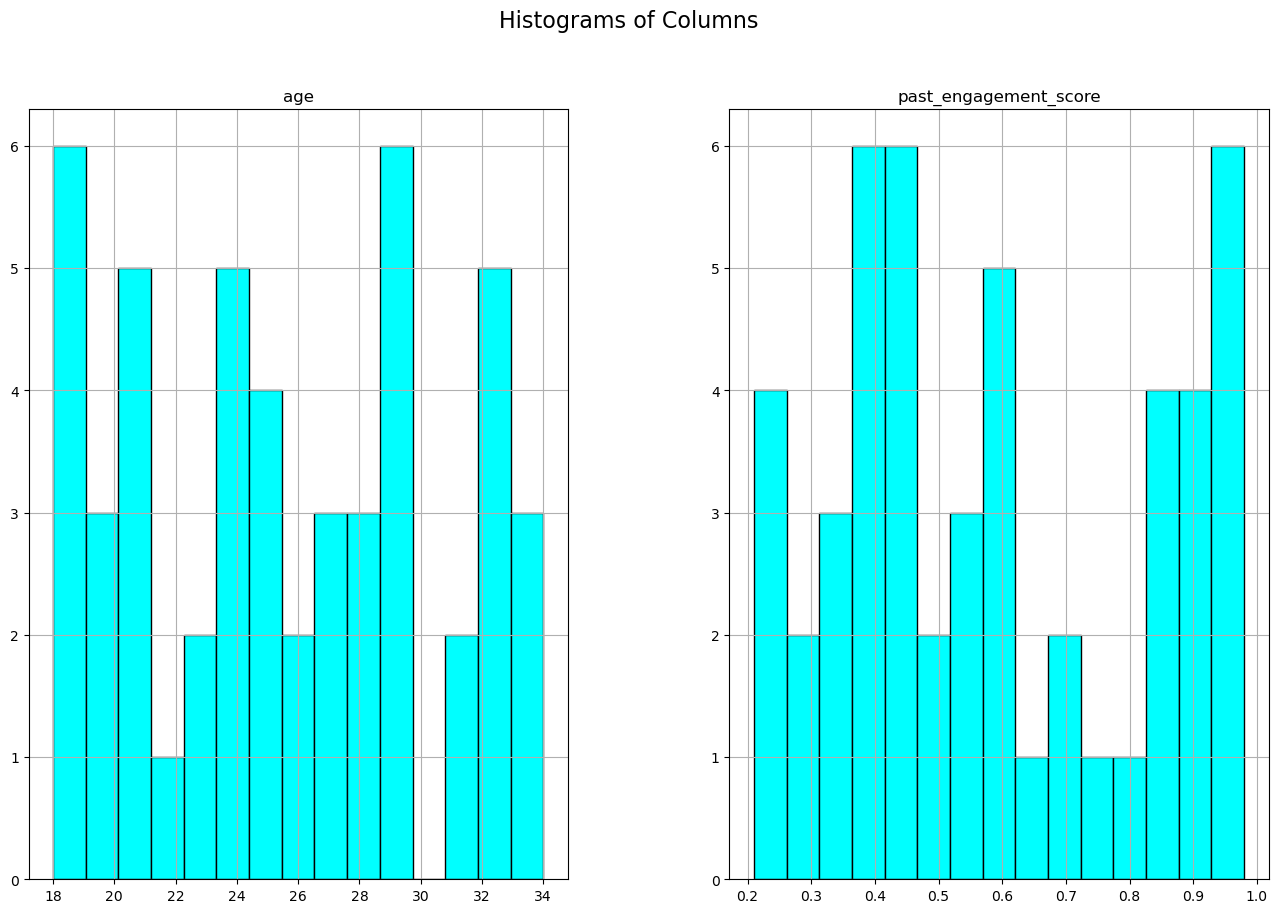

In [15]:
import matplotlib.pyplot as plt

df.hist(bins=15, figsize=(16, 10), color='cyan', edgecolor='black')

# Set titles and labels for each subplot
plt.suptitle('Histograms of Columns', fontsize=16)
plt.subplots_adjust(hspace=0.5)  # Add space between plots
plt.show()

In [16]:
df["past_engagement_score"].value_counts()

past_engagement_score
0.38    3
0.85    3
0.61    2
0.40    2
0.53    2
0.93    2
0.43    2
0.60    2
0.98    1
0.95    1
0.46    1
0.62    1
0.76    1
0.49    1
0.23    1
0.97    1
0.44    1
0.30    1
0.69    1
0.24    1
0.42    1
0.39    1
0.47    1
0.54    1
0.21    1
0.89    1
0.29    1
0.45    1
0.92    1
0.63    1
0.91    1
0.35    1
0.84    1
0.90    1
0.71    1
0.94    1
0.33    1
0.26    1
0.80    1
0.32    1
Name: count, dtype: int64

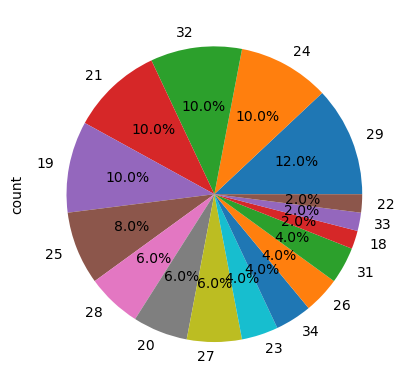

In [17]:
import matplotlib.pyplot as plt
df['age'].value_counts().plot.pie(autopct='%0.1f%%')
plt.show()

In [18]:
top3_posts = (
    df2.groupby('user_id')['post_id']
    .value_counts()
    .groupby(level=0).head(3)
)
print(top3_posts)

user_id  post_id
U1       P1         1
         P27        1
         P32        1
U10      P10        1
         P23        1
                   ..
U8       P12        1
         P19        1
U9       P1         1
         P15        1
         P20        1
Name: count, Length: 150, dtype: int64


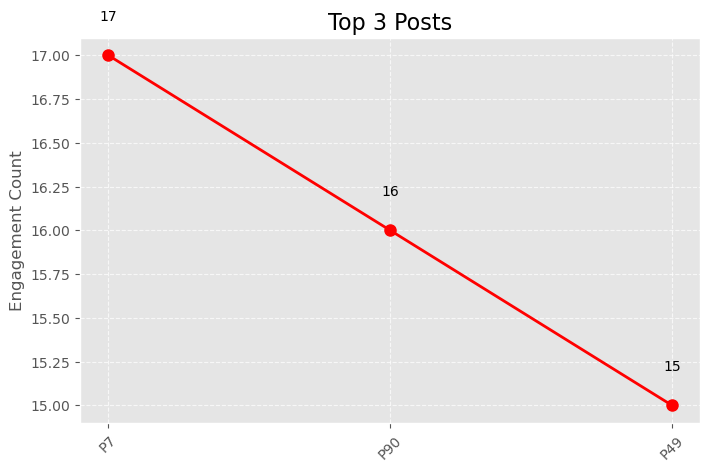

In [19]:
import matplotlib.pyplot as plt
from matplotlib import style

# top 3 posts 
top3_posts = df2['post_id'].value_counts().head(3)

style.use('ggplot')
plt.figure(figsize=(8,5))
plt.plot(top3_posts.index, top3_posts.values, marker='o', color='red', linestyle='-', linewidth=2, markersize=8)

plt.xticks(rotation=45, fontsize=10)
plt.title('Top 3 Posts', fontsize=16)
plt.ylabel('Engagement Count', fontsize=12)

for i, value in enumerate(top3_posts.values):
    plt.text(i, value + 0.2, str(value), ha='center', fontsize=10, color='black')

plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In summary, this plot illustrates a clear ranking of the top 3 posts based on the "Engagement Count" metric. There's a significant drop-off from the top post, followed by a more gradual decline towards the lower end of the top 3.

# Checking Correlation between the features

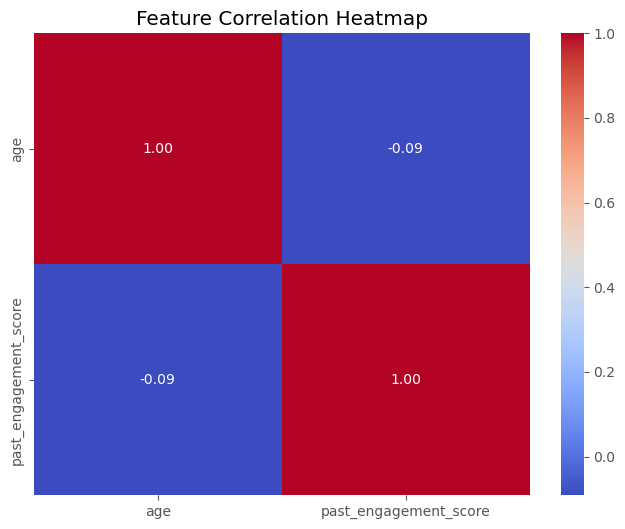

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter(df, x, y, title):
    plt.figure(figsize=(8, 5))
    ax = sns.scatterplot(x=x, y=y, data=df, alpha=0.6, edgecolor="w")
    ax.set_title(title, fontsize=14)
    plt.show()

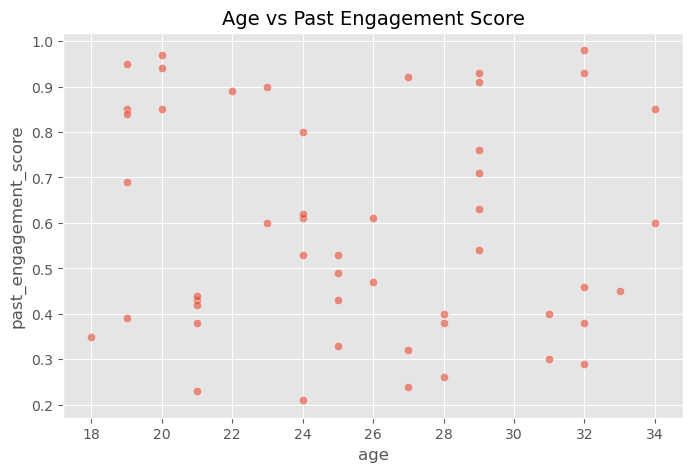

In [22]:
scatter(df, "age", "past_engagement_score", "Age vs Past Engagement Score")

# Detect Outliers

In [23]:
df['past_engagement_score'].describe()

count    50.000000
mean      0.587800
std       0.240682
min       0.210000
25%       0.392500
50%       0.535000
75%       0.847500
max       0.980000
Name: past_engagement_score, dtype: float64

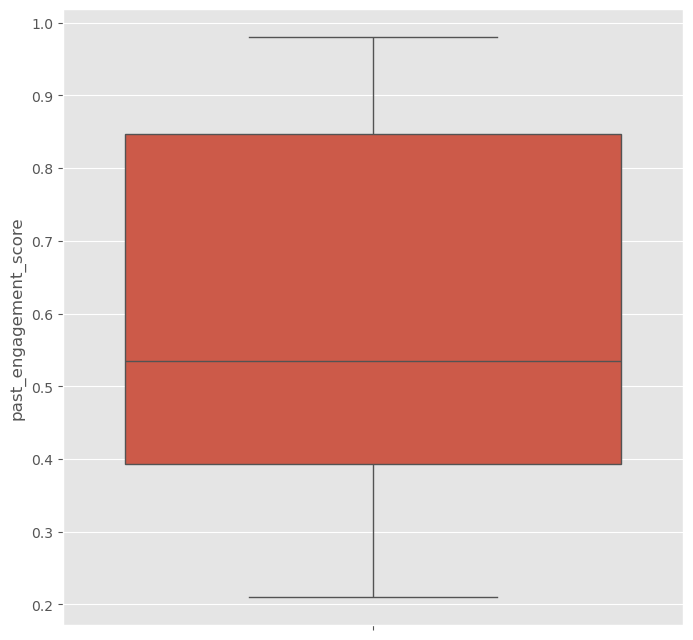

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.boxplot(data=df, y="past_engagement_score", orient="v")
plt.show()

# Encode Categorical Features

In [25]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Users single-label features
df['gender'] = le.fit_transform(df['gender'])

# Posts single-label features
df1['creator_id'] = le.fit_transform(df1['creator_id'])
df1['content_type'] = le.fit_transform(df1['content_type'])

In [26]:
# IDs should be strings (safe for merging)
df['user_id'] = df['user_id'].astype(str)
df1['post_id'] = df1['post_id'].astype(str)
df2['user_id'] = df2['user_id'].astype(str)
df2['post_id'] = df2['post_id'].astype(str)

# Merge engagements with users
merged_df = df2.merge(df, on='user_id', how='left')

# Merge with posts
merged_df = merged_df.merge(df1, on='post_id', how='left')

print("Merged df shape:", merged_df.shape)

Merged df shape: (1000, 10)


In [27]:
# just split interests and tags
merged_df['top_3_interests'] = merged_df['top_3_interests'].apply(lambda x: str(x).split(','))
merged_df['tags'] = merged_df['tags'].apply(lambda x: str(x).split(','))

# count how many interests match the post tags
merged_df['interest_match'] = 0
for i in range(len(merged_df)):
    merged_df['interest_match'][i] = len(set(merged_df['top_3_interests'][i]) & set(merged_df['tags'][i]))

# make a simple score
merged_df['score'] = merged_df['past_engagement_score'] + merged_df['interest_match']

# pick top 3 posts for each user
top3 = merged_df.sort_values(['user_id','score'], ascending=[True,False]).groupby('user_id').head(3)

# show it
top3[['user_id','post_id','score']]

,user_id,post_id,score
2,U1,P1,1.61
3,U1,P4,1.61
4,U1,P65,1.61
180,U10,P37,1.94
195,U10,P63,1.94
...,...,...,...
140,U8,P98,0.43
141,U8,P28,0.43
160,U9,P30,1.33
169,U9,P55,1.33


# Splitting Data to train and test

In [28]:
# Used a combination of interest_match and past_engagement_score as target
merged_df['target_score'] = merged_df['past_engagement_score'] + merged_df['interest_match']

X = merged_df[['past_engagement_score','interest_match','gender']]  # simple features
y = merged_df['target_score']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating Model

In [29]:
# Train RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

# Evaluating Score

In [30]:
from sklearn.metrics import r2_score
print("R2:", r2_score(y_test, y_pred))

R2: 0.9957776430567667
